In [1]:
%matplotlib inline

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

import scanpy as sc

import sys
sys.path.append('/home/ngr4/project')
import scnd.scripts.data as scnddata
import scnd.scripts.utils as scndutils

import bbknn
import phate

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=1
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

In [2]:
adata = scnddata.load_annotated_hum_redo()

In [3]:
markers = [
    'GABRA6', 'SLC17A7', 'SLC17A6', 'EOMES', 
    'ATP2A3', 'CALB1', 'CA8', 'PPP1R17', 'SLC1A6', 
    'GAD1', 'GAD2', 'NTN1', 'MEGF10', 'ALDH1L1', 'AQP4',
    'GDF10', 'HOPX', 'OLIG1', 'OLIG2', 'PDGFRA',
    'HAPLN2', 'MAG', 'MOG', 'OPALIN', 'C1QB', 
    'CX3CR1', 'DOCK2', 'P2RY12', 'FLT1', 'RGS5', 'DCN', 'LUM', 'KDR',
    'LYPD6', 'SORCS3', 'PTPRK', 'NXPH1', 'CDH22', 'LGI2',
]

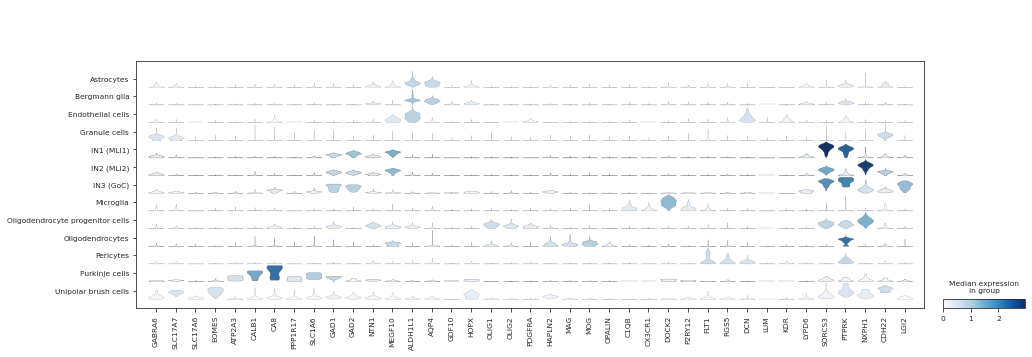

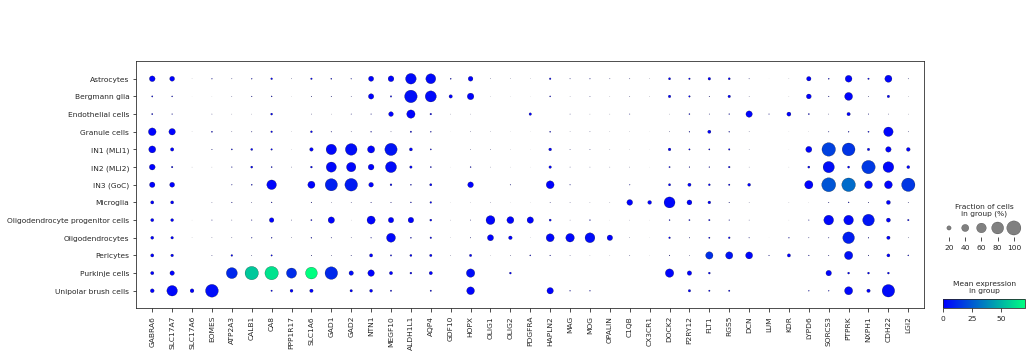

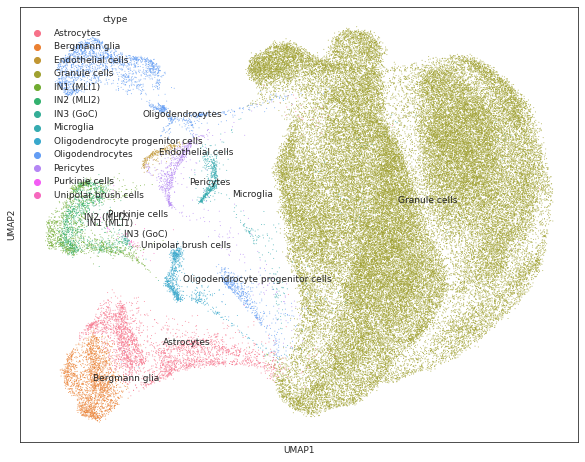

In [3]:

scndutils.ctype_plots(adata, markers, plotfp='/home/ngr4/project/scnd/results/', short_name='ctype')

In [5]:
# match the color palettes
cmap_ctype={'Granule cells': '#FAC18A',
            'Unipolar brush cells': '#BA61BA',
            'Purkinje cells': '#EE5264',
            'IN1 (MLI1)': '#F9EBAE',
            'IN2 (MLI2)': '#88BB92',
            'IN3 (GoC)': '#46A928',
            'Astrocytes': '#F9AEAE',
            'Bergmann glia': '#AEB7F9',
            'Oligodendrocyte progenitor cells': '#F1815F',
            'Oligodendrocytes': '#75A3B7',
            'Microglia': '#AC5861',
            'Pericytes': '#2D284B',
            'Endothelial cells': '#1C67EE'}

In [8]:
adata.obs.head()

,batch,Sample,genotype,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pmito,n_genes,doublet_score,predicted_doublet,leiden,source,ctype_v0,ctype_v1,ctype
AAACCCAAGAGCATTA-1-14-ctrl,14,CTRL-1,CTRL,412,6.023448,511.0,6.238325,29.158513,38.943249,58.512720,100.000000,0.000000,412,0.011973,False,1,ctrl,Granule cells,Granule cells,Granule cells
AAACCCAAGGGAGGCA-1-14-ctrl,14,CTRL-1,CTRL,570,6.347389,705.0,6.559615,24.964539,33.333333,47.517730,90.070922,0.001418,570,0.039816,False,1,ctrl,Granule cells,Granule cells,Granule cells
AAACCCACAAGACCGA-1-14-ctrl,14,CTRL-1,CTRL,401,5.996452,516.0,6.248043,31.976744,41.666667,61.046512,100.000000,0.001938,401,0.025759,False,1,ctrl,Granule cells,Granule cells,Granule cells
AAACCCACAATCTCTT-1-14-ctrl,14,CTRL-1,CTRL,485,6.186209,644.0,6.469250,30.745342,40.217391,55.745342,100.000000,0.006211,485,0.029287,False,1,ctrl,Granule cells,Granule cells,Granule cells
AAACCCACACTAACGT-1-14-ctrl,14,CTRL-1,CTRL,2074,7.637716,3617.0,8.193677,22.145424,28.559580,37.434338,54.935029,0.000553,2074,0.040972,False,23,ctrl,Granule cells,Granule cells,Granule cells


In [4]:
pfp = '/home/ngr4/project/scnd/results/'

In [32]:
sc.settings.figdir = pfp

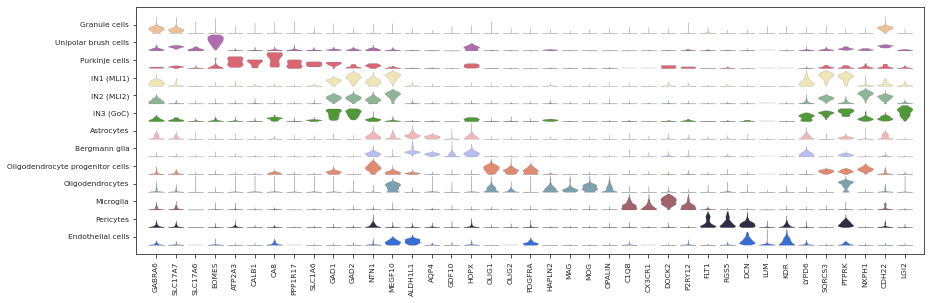

In [35]:
row_order = [k for k in cmap_ctype.keys()]
sc.pl.stacked_violin(adata, markers,
                     groupby='ctype',
                     use_raw=False,
                     layer='imputed',
                     categories_order=row_order,
                     standard_scale='var',
                     row_palette=[cmap_ctype[i] for i in row_order],
                     save='_hum_redo_ctype.pdf')
# .savefig(
#         os.path.join(pfp, 'violin_hum_redo_ctype.pdf'),
#         bbox_inches='tight', 
#         dpi=600)

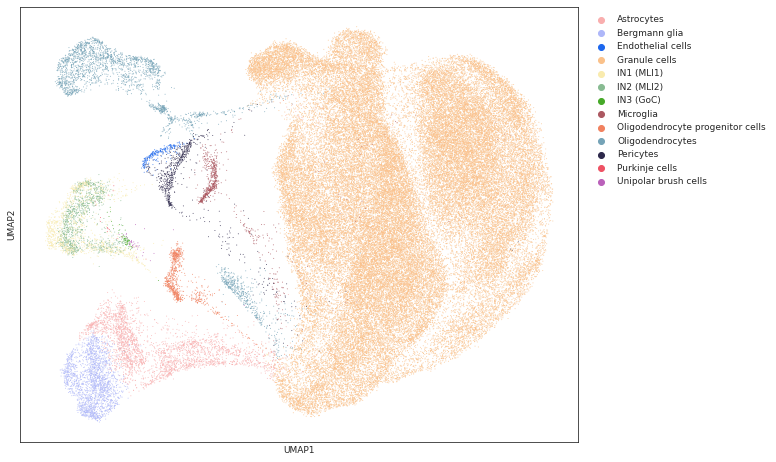

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=adata.obsm['X_umap'][:, 0],
                y=adata.obsm['X_umap'][:, 1],
                hue=adata.obs['ctype'],
                linewidth=0,
                alpha=0.8,
                s=1,
                palette=cmap_ctype,
                rasterized=True,
                ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.legend(bbox_to_anchor=(1.01, 1))

if False:
    for l in tdata.obs[groupby].unique():
        x, y = np.mean(tdata[tdata.obs[groupby]==l, :].obsm['X_umap'], 0)
        ax.text(x, y, l)
fig.savefig(os.path.join(pfp, 'umap_hum_redo_ctype.pdf'), bbox_inches='tight', dpi=600)

In [14]:
def graph_pp(AnnData, use_bbknn=True, k=3, n_pcs=20):
    sc.tl.pca(AnnData, n_comps=n_pcs)
    if use_bbknn:
        bbknn.bbknn(AnnData,
                    n_pcs=n_pcs,
                    neighbors_within_batch=k) # k // len(adata.obs[batch_key].unique()))
    else:
        sc.pp.neighbors(AnnData, n_pcs=n_pcs, n_neighbors=k)
    return AnnData
adata = graph_pp(adata)

In [ ]:
# recalculate umap 
fig = plt.figure(figsize=(20, 20))
min_dist = [0., 0.01, 0.1, 0.2, 0.5, 0.8, 0.99] # default = 0.5
gamma = [0.8, 1., 1.2, 1.5, 2, 5, 10] # default = 1.0
counter = 0
for d in min_dist:
    for g in gamma:
        counter += 1
        ax = fig.add_subplot(7, 7, counter)
        sc.tl.umap(adata, min_dist=d, gamma=g)
        sns.scatterplot(x=adata.obsm['X_umap'][:, 0],
                        y=adata.obsm['X_umap'][:, 1],
                        hue=adata.obs['ctype'],
                        linewidth=0,
                        alpha=0.8,
                        s=1,
                        palette=cmap_ctype,
                        legend=False,
                        rasterized=True,
                        ax=ax)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title('d: {:.2f}\tg: {:.2f}'.format(d, g))
        
fig.tight_layout()
fig.savefig(os.path.join(pfp, 'umap_paramscan_hum_redo_ctype.pdf'), bbox_inches='tight', dpi=600)

In [16]:
print('here')

here


In [ ]:
scnddata.save_adata(adata, '/home/ngr4/project/scnd/data/processed/hum_imp_211012.h5ad')